#### **What is Logistic Regression?**
Logistic Regression is a simple and powerful machine learning algorithm used for **classification tasks**. It helps us predict a binary outcome, such as "Yes or No," "0 or 1," or "Spam or Not Spam." Despite its name, it’s not really a regression algorithm (like Linear Regression); instead, it's used to classify data into categories.

---

#### **How Does It Work?**

1. **Input Data**: 
   Logistic Regression takes input features (like age, income, etc.) and assigns weights to them. Each feature contributes to the overall prediction.

2. **Linear Model**: 
   It calculates a weighted sum of the features and adds a bias (intercept):
   \[
   z = w_1x_1 + w_2x_2 + ... + w_nx_n + b
   \]

   Here:
   - \( w_1, w_2, ..., w_n \) are the weights
   - \( x_1, x_2, ..., x_n \) are the features
   - \( b \) is the bias

3. **Sigmoid Function**: 
   This linear result (\( z \)) is passed through a special function called the **sigmoid function** to squash it into a value between 0 and 1. This value represents the **probability** of the output being "1" (positive class).

   The sigmoid function is defined as:
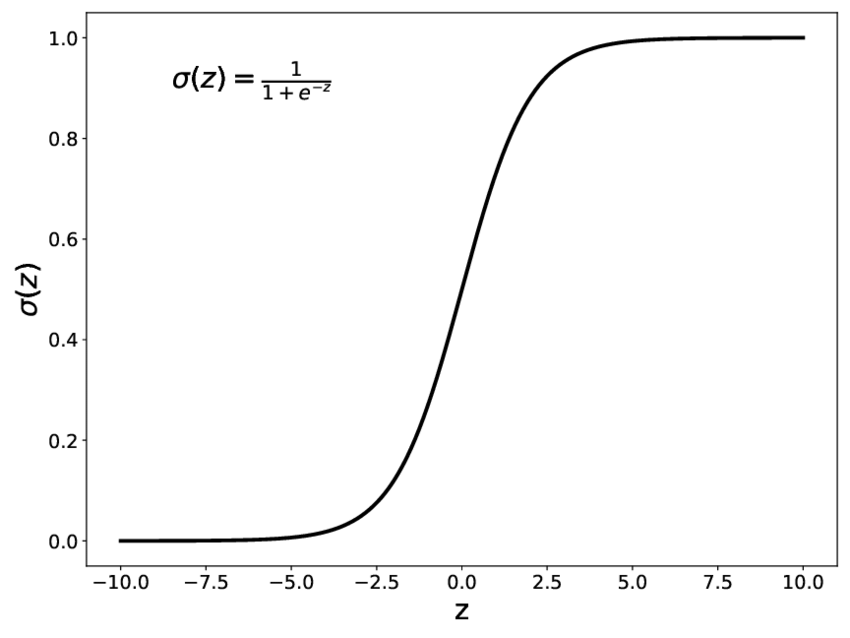
 
4. **Threshold**: 
   The probability is then compared to a threshold (commonly 0.5):
   - If the probability is greater than 0.5, the output is classified as "1."
   - Otherwise, it’s classified as "0."

5. **Learning Rate**: 
   The **learning rate** controls the size of the steps taken during optimization (gradient descent). It determines how much the weights and bias are updated in each step:
   
   \[
      new_parameter = current_parameter - learning_rate * gradient
   \]
   - A small learning rate leads to slower but more stable convergence.
   - A large learning rate may result in faster training but risks overshooting the optimal solution.

6. **Number of Iterations (n_iters)**: 
   The **number of iterations** specifies how many times the algorithm processes the data during training. In each iteration, the model updates the weights and bias using the computed gradients. 
   - Too few iterations may lead to underfitting (the model doesn’t learn enough).
   - Too many iterations may lead to overfitting (the model starts memorizing the training data).


Amazing resource to get an intuitive understanding-> https://youtu.be/slBI5YuVUTM?si=G0ScPjfHeLEKyizp

In [8]:
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))



In [9]:

# Testing
if __name__ == "__main__":
    # Imports
    from sklearn.model_selection import train_test_split
    from sklearn import datasets

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    bc = datasets.load_breast_cancer()
    X, y = bc.data, bc.target

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1234
    )

    regressor = LogisticRegression(learning_rate=0.0001, n_iters=1000)
    regressor.fit(X_train, y_train)
    predictions = regressor.predict(X_test)

    print("LR classification accuracy:", accuracy(y_test, predictions))

LR classification accuracy: 0.9298245614035088
